## Imports

In [588]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [589]:
df=pd.read_csv('Hour By Hour Race Analysis.csv',encoding='latin-1')

In [590]:
df

,S.No,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,Status
0,1,1,8,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA,Toyota GR010 HYBRID,HYPERCAR,M,12,01:01:15,0,10.0,03:29.7,234.0,Running
1,2,1,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,12,01:01:19,0,12.0,03:29.1,234.6,Running
2,3,1,7,Toyota Gazoo Racing,M. CONWAY / K. KOBAYASHI / J. LOPEZ,Toyota GR010 HYBRID,HYPERCAR,M,12,01:01:21,0,12.0,03:30.0,233.6,Running
3,4,1,75,Porsche Penske Motorsport,F. NASR / M. JAMINET / N. TANDY,Porsche 963,HYPERCAR,M,12,01:01:22,0,12.0,03:29.9,233.7,Running
4,5,1,6,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR,Porsche 963,HYPERCAR,M,12,01:01:23,0,9.0,03:30.0,233.6,Running
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,1482,24,60,Iron Lynx,C. SCHIAVONI / M. CRESSONI / A. PICARIELLO,Porsche 911 RSR - 19,LMGTE Am,M,28,02:20:55,2,8.0,03:51.4,212.0,Retired
1482,1483,24,16,Proton Competition,R. HARDWICK / Z. ROBICHON / J. HEYLEN,Porsche 911 RSR - 19,LMGTE Am,M,28,02:20:57,2,10.0,03:58.7,205.5,Retired
1483,1484,24,55,GMB Motorsport,G. BIRCH / M. SØRENSEN/ J. MØLLER,Aston Martin Vantage AMR,LMGTE Am,M,21,01:45:27,2,17.0,03:56.2,207.7,Retired
1484,1485,24,21,AF Corse,S. MANN / J. PIGUET / U. DE PAUW,Ferrari 488 GTE Evo,LMGTE Am,M,21,01:45:28,2,11.0,03:54.8,208.9,Retired


## First exploration

### Main statistics

In [591]:
print(df.describe())

              S.No         Hour      Car No.         Laps     Pitstops  \
count  1486.000000  1486.000000  1486.000000  1486.000000  1486.000000   
mean    743.500000    12.486541   110.202557   129.432705    12.392328   
std     429.115563     6.919218   212.301974    91.422300     8.631954   
min       1.000000     1.000000     0.000000     1.000000     0.000000   
25%     372.250000     6.250000    24.000000    45.000000     5.000000   
50%     743.500000    12.000000    45.000000   112.000000    11.000000   
75%    1114.750000    18.000000    77.000000   199.000000    19.000000   
max    1486.000000    24.000000   923.000000   342.000000    35.000000   

       Best Lap Number  Best Lap Kph  
count      1485.000000   1485.000000  
mean         57.252525    221.817172  
std          84.580845      9.669204  
min           3.000000    204.100000  
25%          10.000000    211.200000  
50%          11.000000    224.600000  
75%          56.000000    230.400000  
max         320.00000

### Data types

In [592]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S.No             1486 non-null   int64  
 1   Hour             1486 non-null   int64  
 2   Car No.          1486 non-null   int64  
 3   Team             1486 non-null   object 
 4   Drivers          1486 non-null   object 
 5   Car              1485 non-null   object 
 6   Category         1486 non-null   object 
 7   Tyres            1485 non-null   object 
 8   Laps             1486 non-null   int64  
 9   Total Time       1486 non-null   object 
 10  Pitstops         1486 non-null   int64  
 11  Best Lap Number  1485 non-null   float64
 12  Best LapTime     1485 non-null   object 
 13  Best Lap Kph     1485 non-null   float64
 14  Status           1486 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 174.3+ KB
None


### Null values

In [593]:
print(df.isnull().sum())

S.No               0
Hour               0
Car No.            0
Team               0
Drivers            0
Car                1
Category           0
Tyres              1
Laps               0
Total Time         0
Pitstops           0
Best Lap Number    1
Best LapTime       1
Best Lap Kph       1
Status             0
dtype: int64


### Columns names

In [594]:
df.columns

Index(['S.No', 'Hour', 'Car No.', 'Team', 'Drivers', 'Car', 'Category',
       'Tyres  ', 'Laps', 'Total Time', 'Pitstops', 'Best Lap Number',
       'Best LapTime', 'Best Lap Kph', 'Status'],
      dtype='object')

## Data cleansing

### Remove NaN

In [595]:
df = df.dropna()

### Change data types

In [596]:
df.head()

,S.No,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,Status
0,1,1,8,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA,Toyota GR010 HYBRID,HYPERCAR,M,12,01:01:15,0,10.0,03:29.7,234.0,Running
1,2,1,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,12,01:01:19,0,12.0,03:29.1,234.6,Running
2,3,1,7,Toyota Gazoo Racing,M. CONWAY / K. KOBAYASHI / J. LOPEZ,Toyota GR010 HYBRID,HYPERCAR,M,12,01:01:21,0,12.0,03:30.0,233.6,Running
3,4,1,75,Porsche Penske Motorsport,F. NASR / M. JAMINET / N. TANDY,Porsche 963,HYPERCAR,M,12,01:01:22,0,12.0,03:29.9,233.7,Running
4,5,1,6,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR,Porsche 963,HYPERCAR,M,12,01:01:23,0,9.0,03:30.0,233.6,Running


In [597]:
df.dtypes

S.No                 int64
Hour                 int64
Car No.              int64
Team                object
Drivers             object
Car                 object
Category            object
Tyres               object
Laps                 int64
Total Time          object
Pitstops             int64
Best Lap Number    float64
Best LapTime        object
Best Lap Kph       float64
Status              object
dtype: object

### Remove useless spaces in columns names

In [598]:
df.columns = df.columns.str.strip()

### Date format

In [599]:
df['Total Time'] = pd.to_timedelta(df['Total Time'])

/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_80278/372490728.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [600]:
def extract_minutes_seconds(time_str):

    if '.' in time_str:
        return time_str.split('.')[0]# Remove details after seconds
    return time_str

df.loc[:, 'Best LapTime'] = df['Best LapTime'].apply(extract_minutes_seconds)

In [601]:
df.loc[:, 'Best LapTime'] = '00:' + df['Best LapTime']  # Add hours to be recognized as a timedelta

In [602]:
df['Best LapTime'] = pd.to_timedelta(df['Best LapTime'])# Convert Best LapTime into a Time format column

/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_80278/1990463859.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Output new formats

In [696]:
df.dtypes

S.No                         int64
Hour                         int64
Car No.                      int64
Team                        object
Drivers                     object
Car                         object
Category                    object
Tyres                       object
Laps                         int64
Total Time         timedelta64[ns]
Pitstops                     int64
Best Lap Number            float64
Best LapTime       timedelta64[ns]
Best Lap Kph               float64
Status                      object
Car Model                   object
dtype: object

### Remove useless spaces in the Status column

In [605]:
df['Status'] = df['Status'].str.strip()

/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_80278/3372893262.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Harmonize categories

In [606]:
mapping_cat = {
                'HYPERCAR ' : 'HYPERCAR',
                'HYPERCAR H' : 'HYPERCAR'
              }

In [607]:
df.loc[:, 'Category'] = df['Category'].replace(mapping_cat)

### Create a column identifying the model of every car and the number associated to isolate it

In [608]:
df['Car Model'] = df['Car'] + '-' + df['Car No.'].astype(str)

/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_80278/323584985.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## EDA

In [609]:
df_end = df[df['Hour']==24] #To get the final stats, we need to only take into account the last hour

### Number of Laps per Car

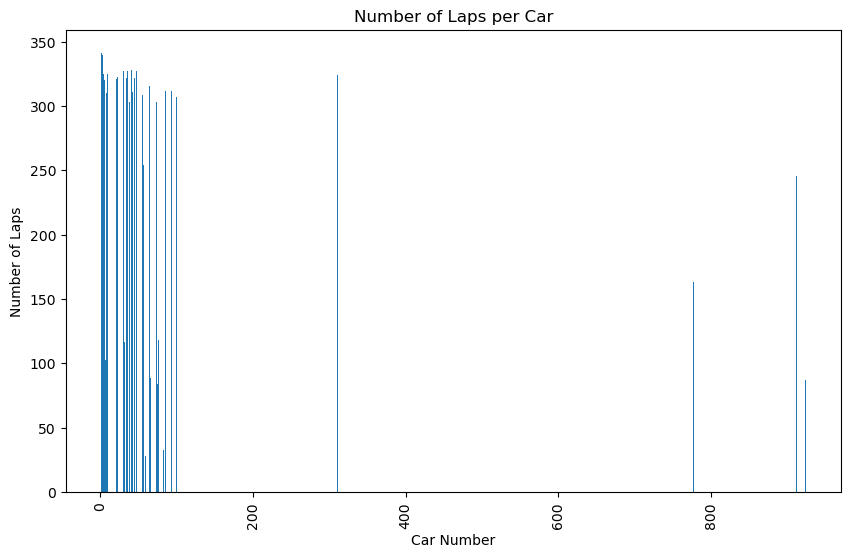

In [610]:
plt.figure(figsize=(10, 6))
plt.bar(df_end['Car No.'], df_end['Laps'])
plt.title('Number of Laps per Car')
plt.xlabel('Car Number')
plt.ylabel('Number of Laps')
plt.xticks(rotation=90)
plt.show()

### Number of Laps per Category

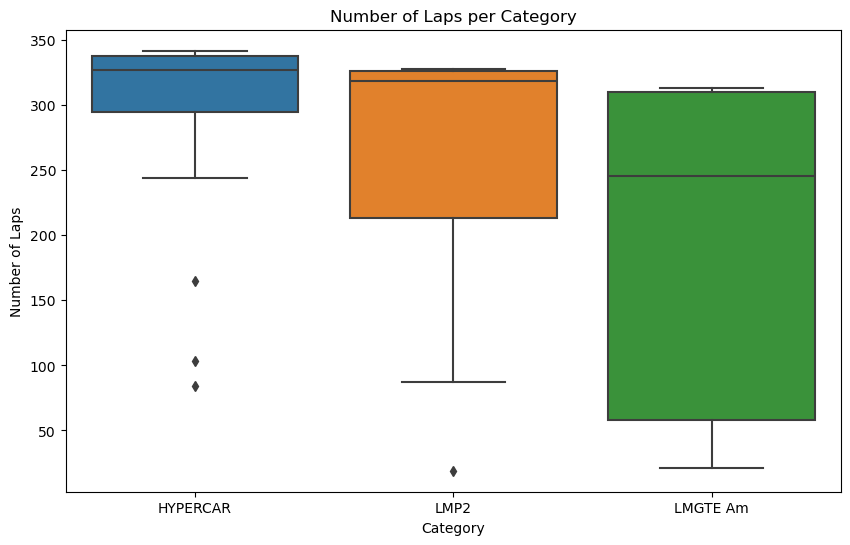

In [611]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_end, x='Category', y='Laps')
plt.title('Number of Laps per Category')
plt.xlabel('Category')
plt.ylabel('Number of Laps')
plt.show()

/Users/stanislas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/stanislas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/stanislas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/stanislas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence

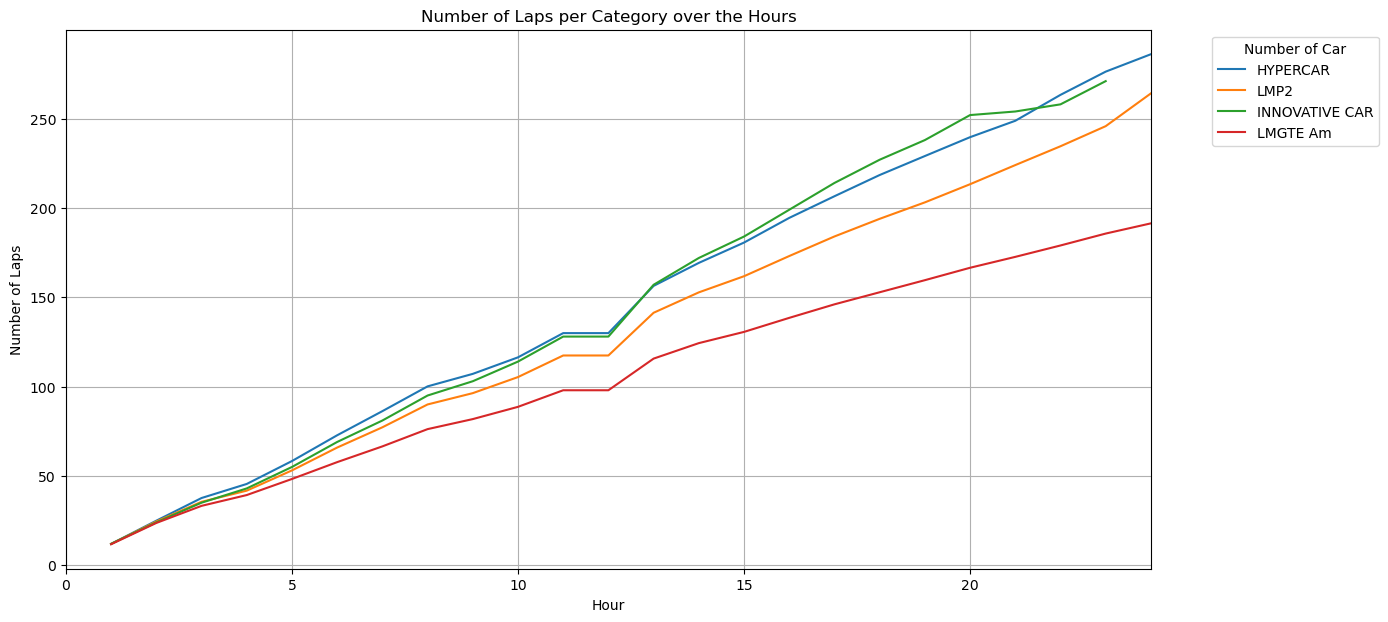

In [612]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Hour', y='Laps', hue='Category', errorbar=None)
plt.title('Number of Laps per Category over the Hours')
plt.xlabel('Hour')
plt.ylabel('Number of Laps')
plt.legend(title='Number of Car', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 24)
plt.grid(True)
plt.show()

### Number of Laps per Drivers

/Users/stanislas/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 150 (\x96) missing from current font.

/Users/stanislas/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 156 (\x9c) missing from current font.



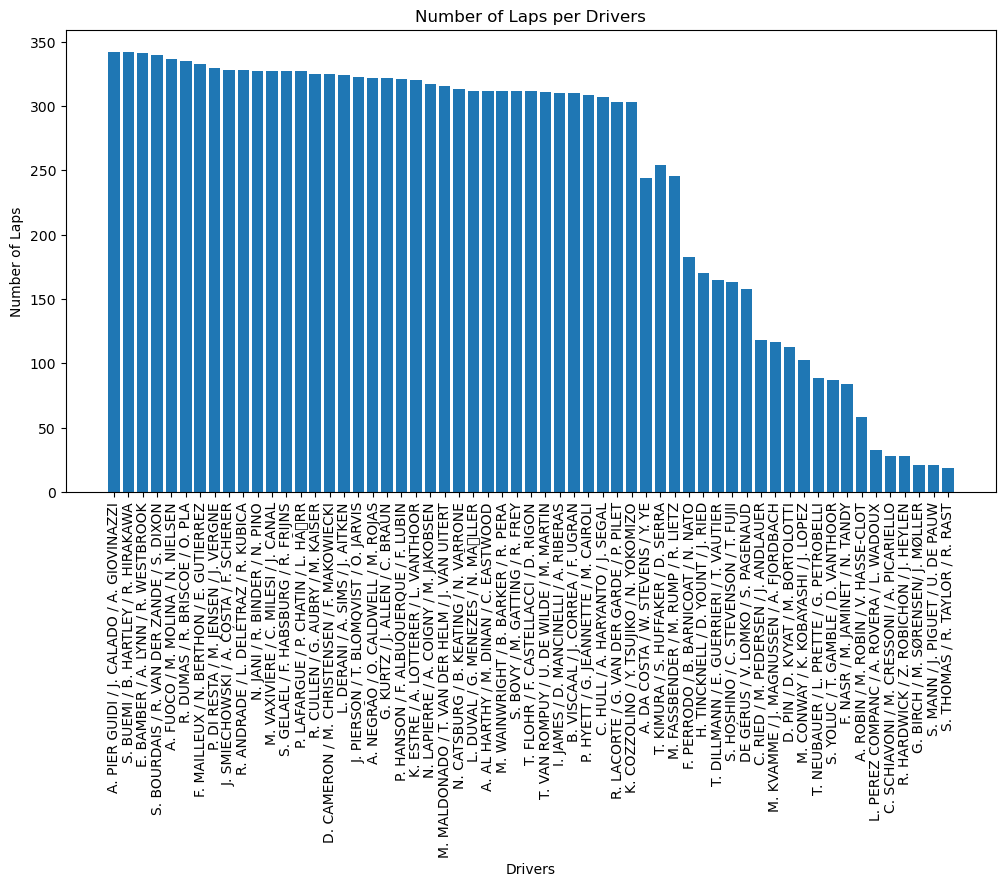

In [613]:
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(12, 6))
plt.bar(df_end['Drivers'],df_end['Laps'])
plt.title('Number of Laps per Drivers')
plt.xlabel('Drivers')
plt.ylabel('Number of Laps')
plt.xticks(rotation=90)
plt.show()

### Best Lap Times for every Car

In [614]:
best_lap_times = pd.DataFrame(df_end.groupby('Car Model')['Best LapTime'].min()).reset_index().sort_values(by='Best LapTime')

In [615]:
best_lap_times

,Car Model,Best LapTime
57,Toyota GR010 HYBRID-8,0 days 00:03:27
17,Ferrari 499P-51,0 days 00:03:27
16,Ferrari 499P-50,0 days 00:03:27
54,Porsche 963-6,0 days 00:03:28
53,Porsche 963-5,0 days 00:03:28
5,Cadillac V-Series.R-2,0 days 00:03:28
6,Cadillac V-Series.R-3,0 days 00:03:28
7,Cadillac V-Series.R-311,0 days 00:03:28
52,Porsche 963-38,0 days 00:03:28
43,Peugeot 9X8-94,0 days 00:03:28


### Pitstops per car

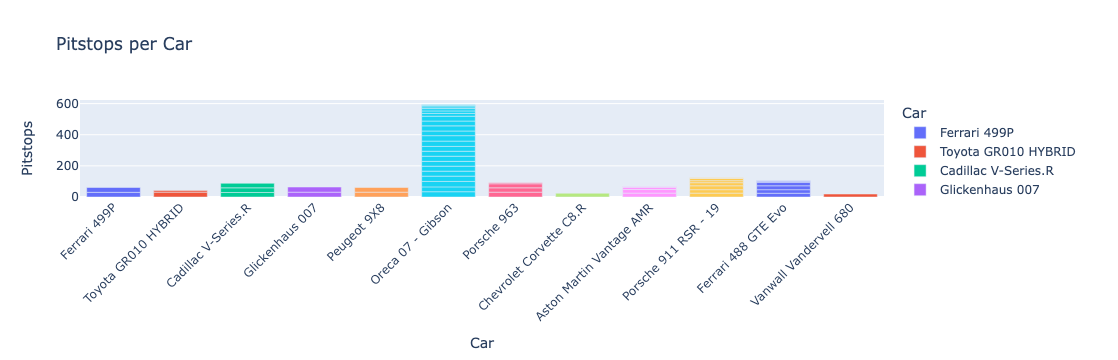

In [616]:
fig = px.bar(df_end, x='Car', y='Pitstops', color='Car',
             labels={'Pitstops': 'Pitstops', 'Car': 'Car'},
             title='Pitstops per Car')

fig.update_layout(xaxis_title='Car', yaxis_title='Pitstops', xaxis_tickangle=-45)
fig.show()

In [617]:
df_end.groupby('Car')['Pitstops'].sum()

Car
Aston Martin Vantage AMR     69
Cadillac V-Series.R          88
Chevrolet Corvette C8.R      24
Ferrari 488 GTE Evo         106
Ferrari 499P                 61
Glickenhaus 007              64
Oreca 07 - Gibson           592
Peugeot 9X8                  61
Porsche 911 RSR - 19        123
Porsche 963                  92
Toyota GR010 HYBRID          41
Vanwall Vandervell 680       19
Name: Pitstops, dtype: int64

Oreca 07 - Gibson seems to have too many pitstops. We will withdraw it from the analysis. Let's also take only the Running Cars at the end of the race. The other ones will create some biases.

In [618]:
df_end = df_end[df_end['Car']!='Oreca 07 - Gibson'] #Remove Oreca 07 - Gibson

In [619]:
df_end = df_end[df_end['Status']=='Running']

### Pitstop per car - Corrected

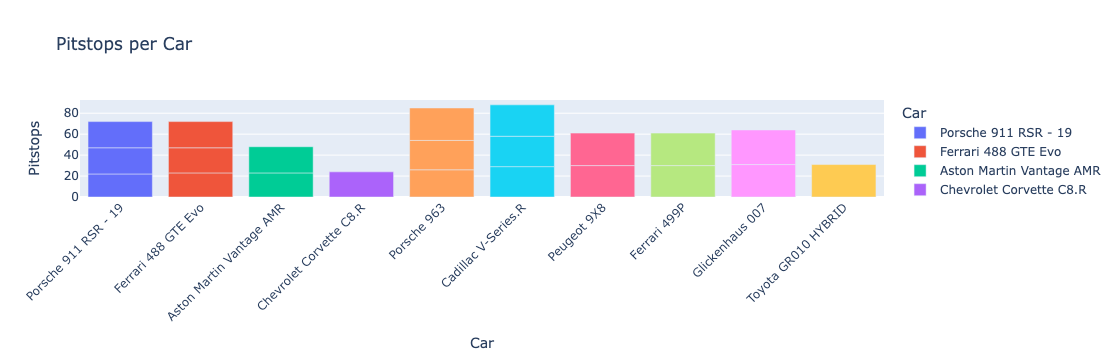

In [697]:
df_end_sorted = df_end.sort_values(by='Pitstops')

fig = px.bar(df_end_sorted, x='Car', y='Pitstops', color='Car',
             labels={'Pitstops': 'Pitstops', 'Car': 'Car'},
             title='Pitstops per Car')

fig.update_layout(xaxis_title='Car', yaxis_title='Pitstops', xaxis_tickangle=-45)
fig.show()

### Number of Laps a car can do without needing to go to the pit

In [621]:
df_end['AVG Number of Laps Without Stopping'] = df_end['Laps']/df_end['Pitstops']

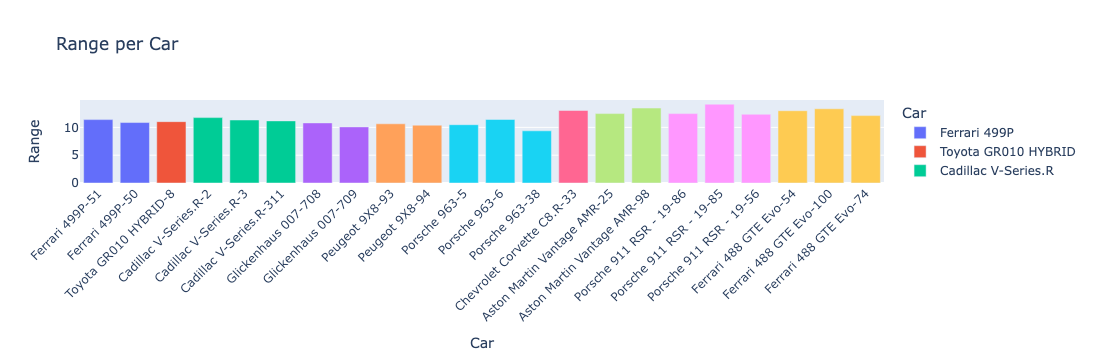

In [622]:
fig = px.bar(df_end, x='Car Model', y='AVG Number of Laps Without Stopping', color='Car',
             labels={'AVG Number of Laps Without Stopping': 'Car Range', 'Car Model': 'Car'},
             title='Range per Car')

fig.update_layout(xaxis_title='Car', yaxis_title='Range', xaxis_tickangle=-45)
fig.show()

Seems we have a difference between the Hypercars who have to go back to the pit every 10 laps, and the GT-Pro, which are way more resistant.

### Max speed

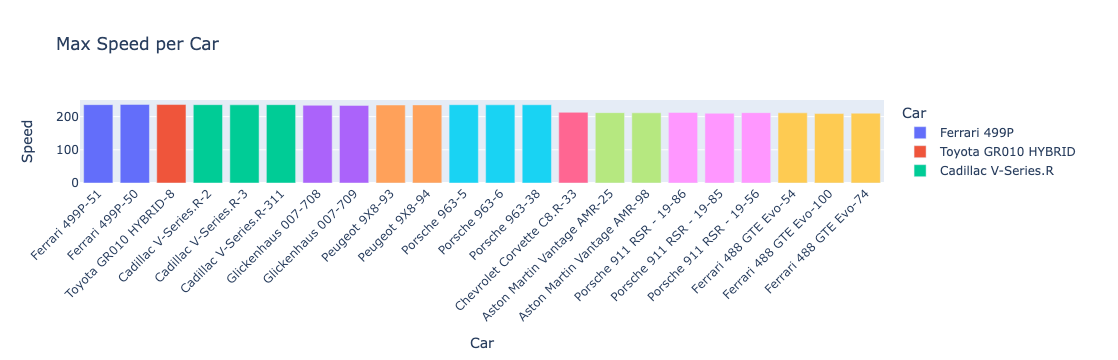

In [623]:
fig = px.bar(df_end, x='Car Model', y='Best Lap Kph', color='Car',
             labels={'Best Lap Kph': 'Max Speed', 'Car Model': 'Car'},
             title='Max Speed per Car')

fig.update_layout(xaxis_title='Car', yaxis_title='Speed', xaxis_tickangle=-45)

fig.update_yaxes(range=[0, 250])

fig.show()

## Focus on the 5 first cars

We want to know what made the Ferrari 51 win the race. Which factors could be responsible for it?
Let's analyse the main differences between this car and the other ones in terms of performance.

### Identify the 5 first cars

In [624]:
Top_5 = df_end.head()['Car No.'].to_list() #df_end is sorted by laps, in an ascending order. By taking the 5 first lines, we take the 5 first cars in terms of final ranking.

In [625]:
df_top_5 = df[df['Car No.'].isin(Top_5)]

In [626]:
df_top_5.columns

Index(['S.No', 'Hour', 'Car No.', 'Team', 'Drivers', 'Car', 'Category',
       'Tyres', 'Laps', 'Total Time', 'Pitstops', 'Best Lap Number',
       'Best LapTime', 'Best Lap Kph', 'Status', 'Car Model'],
      dtype='object')

It seems the tyres are always the same. This variable should not be able to explain any difference between the performance of the cars

In [627]:
df_top_5['Tyres'].value_counts()

Tyres
M    119
Name: count, dtype: int64

### Check that all cars appear 24 times, for 24 hours

In [628]:
df_top_5['Car Model'].value_counts()

Car Model
Toyota GR010 HYBRID-8    24
Cadillac V-Series.R-2    24
Ferrari 499P-50          24
Cadillac V-Series.R-3    24
Ferrari 499P-51          23
Name: count, dtype: int64

In [629]:
df_top_5[df_top_5['Car Model']=='Ferrari 499P-51']

,S.No,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,Status,Car Model
1,2,1,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,12,0 days 01:01:19,0,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51
70,71,2,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,26,0 days 02:01:36,2,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51
125,126,3,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,39,0 days 03:05:07,4,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51
194,195,4,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,47,0 days 04:05:33,5,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51
253,254,5,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,60,0 days 05:04:57,6,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51
310,311,6,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,75,0 days 06:02:05,7,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51
372,373,7,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,89,0 days 07:01:58,8,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51
437,438,8,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,104,0 days 08:08:31,10,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51
500,501,9,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,112,0 days 09:05:23,11,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51
561,562,10,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,123,0 days 10:01:32,12,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51


Seems the hour 21 is missing. By searching on the Internet, we can retrieve this missing hour and input manually to the dataframe.

In [630]:
len(df) #To know which S.No attribute

1483

### Add the missing row manually, using information from the race

In [631]:
df_top_5.dtypes

S.No                         int64
Hour                         int64
Car No.                      int64
Team                        object
Drivers                     object
Car                         object
Category                    object
Tyres                       object
Laps                         int64
Total Time         timedelta64[ns]
Pitstops                     int64
Best Lap Number            float64
Best LapTime       timedelta64[ns]
Best Lap Kph               float64
Status                      object
Car Model                   object
dtype: object

In [632]:
new_row = {
    'S.No': 1483,
    'Hour': 21,
    'Car No.': 51,
    'Team': 'Ferrari AF Corse',
    'Drivers': 'A. PIER GUIDI / J. CALADO / A. GIOVINAZZI',
    'Car': 'Ferrari 499P',
    'Category': 'HYPERCAR',
    'Tyres': 'M',
    'Laps': 293,
    'Total Time': '0 days 21:00:12',
    'Pitstops': 26,
    'Best Lap Number': 264.0,
    'Best LapTime': '0 days 00:03:27',
    'Best Lap Kph': 236.0,
    'Status': 'Running',
    'Car Model': 'Ferrari 499P-51'
}

In [633]:
df_top_5.loc[len(df_top_5)] = new_row

/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_80278/416605248.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In order to be sure, let's count again.

In [634]:
df_top_5['Car Model'].value_counts()

Car Model
Toyota GR010 HYBRID-8    24
Ferrari 499P-51          24
Cadillac V-Series.R-2    24
Ferrari 499P-50          24
Cadillac V-Series.R-3    24
Name: count, dtype: int64

### Give ranking to the cars depending on the number of laps made every hour

In [635]:
df_top_5 = df_top_5.sort_values(by=['Hour', 'Laps', 'Best Lap Kph'], ascending=[True, False, False])

df_top_5['Rank'] = df_top_5.groupby('Hour').cumcount() + 1

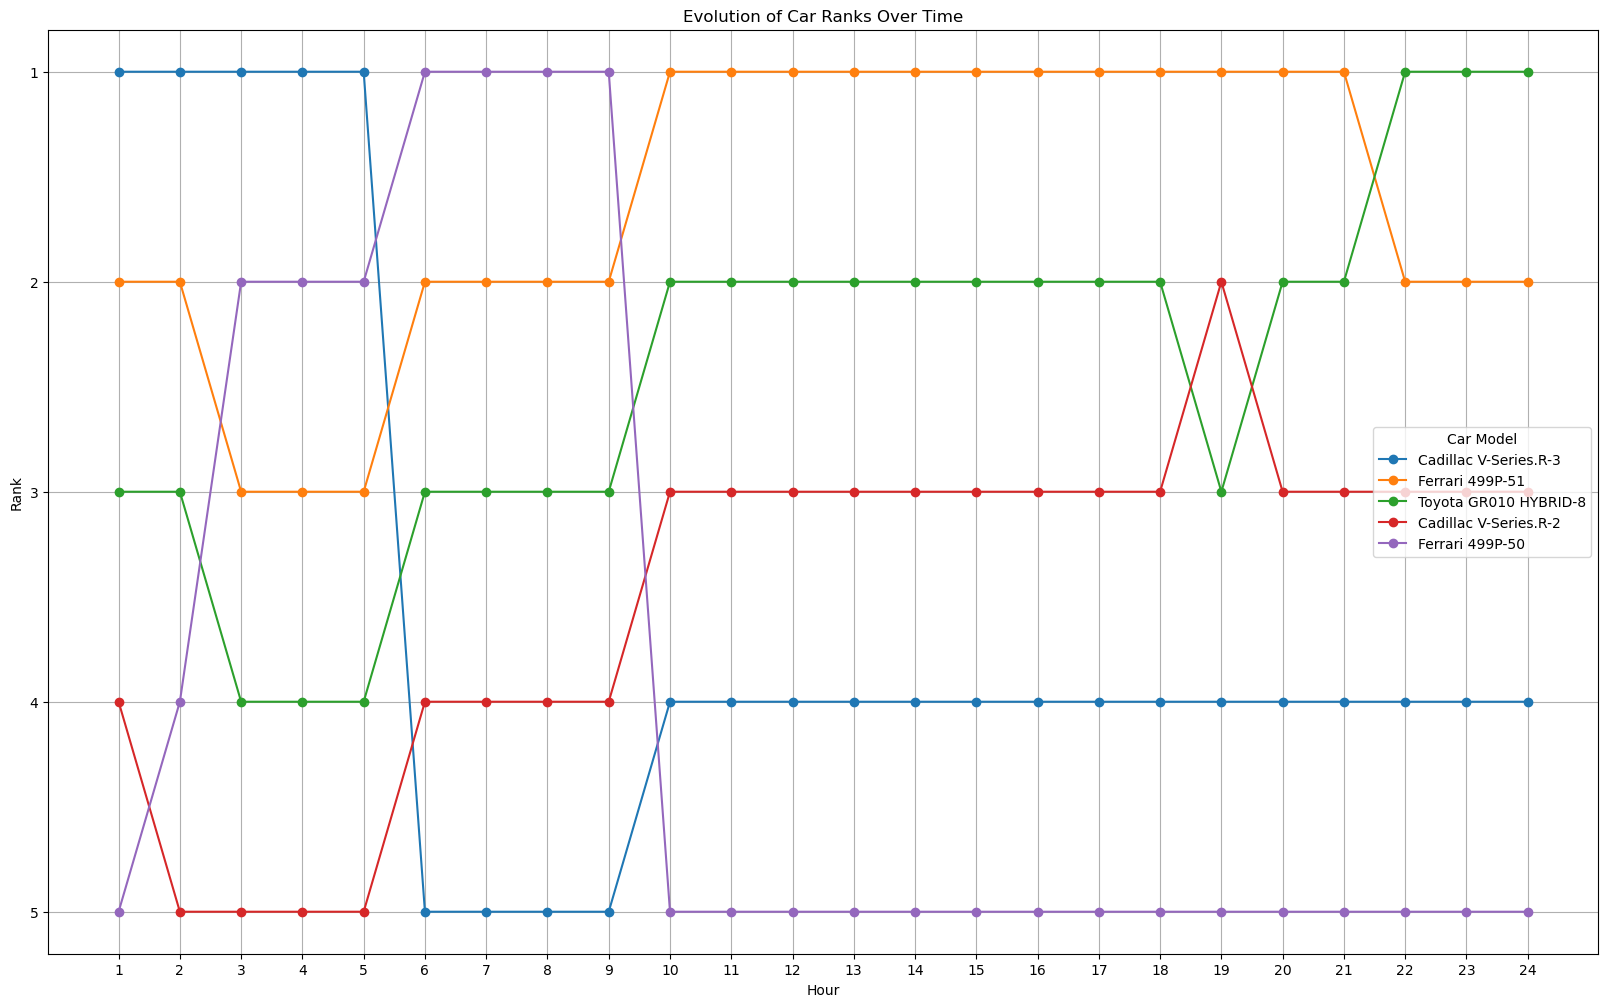

In [637]:
plt.figure(figsize=(20, 12))

#Car evolution over the hours
for car_model in df_top_5['Car Model'].unique():
    car_data = df_top_5[df_top_5['Car Model'] == car_model]
    plt.plot(car_data['Hour'], car_data['Rank'], marker='o', label=car_model)

#1 must be upwards
plt.gca().invert_yaxis()

plt.yticks([1, 2, 3, 4, 5])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

plt.xlabel('Hour')
plt.ylabel('Rank')
plt.title('Evolution of Car Ranks Over Time')
plt.legend(title='Car Model',loc='center right')
plt.grid(True)

# Display
plt.show()

In [638]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs) -> 'Legend'
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    .. note::
        Specific artists can be excluded from the a

Looks like the dataset is not perfect. The Ferrari 499P-51 won the race and not the Toyota.
We do not have any way to know it precisely here.
In fact, we would have need a ranking column from the beginning.
Let's do other calculations.

### Adjust the rank to be sure we do not attribute false rankings

We can just rely on the number of laps. It won't be super effective, but we cannot do more.

In [639]:
df_top_5['Rank Adjusted'] = df_top_5.groupby('Hour')['Laps'].rank(method='min', ascending=False)

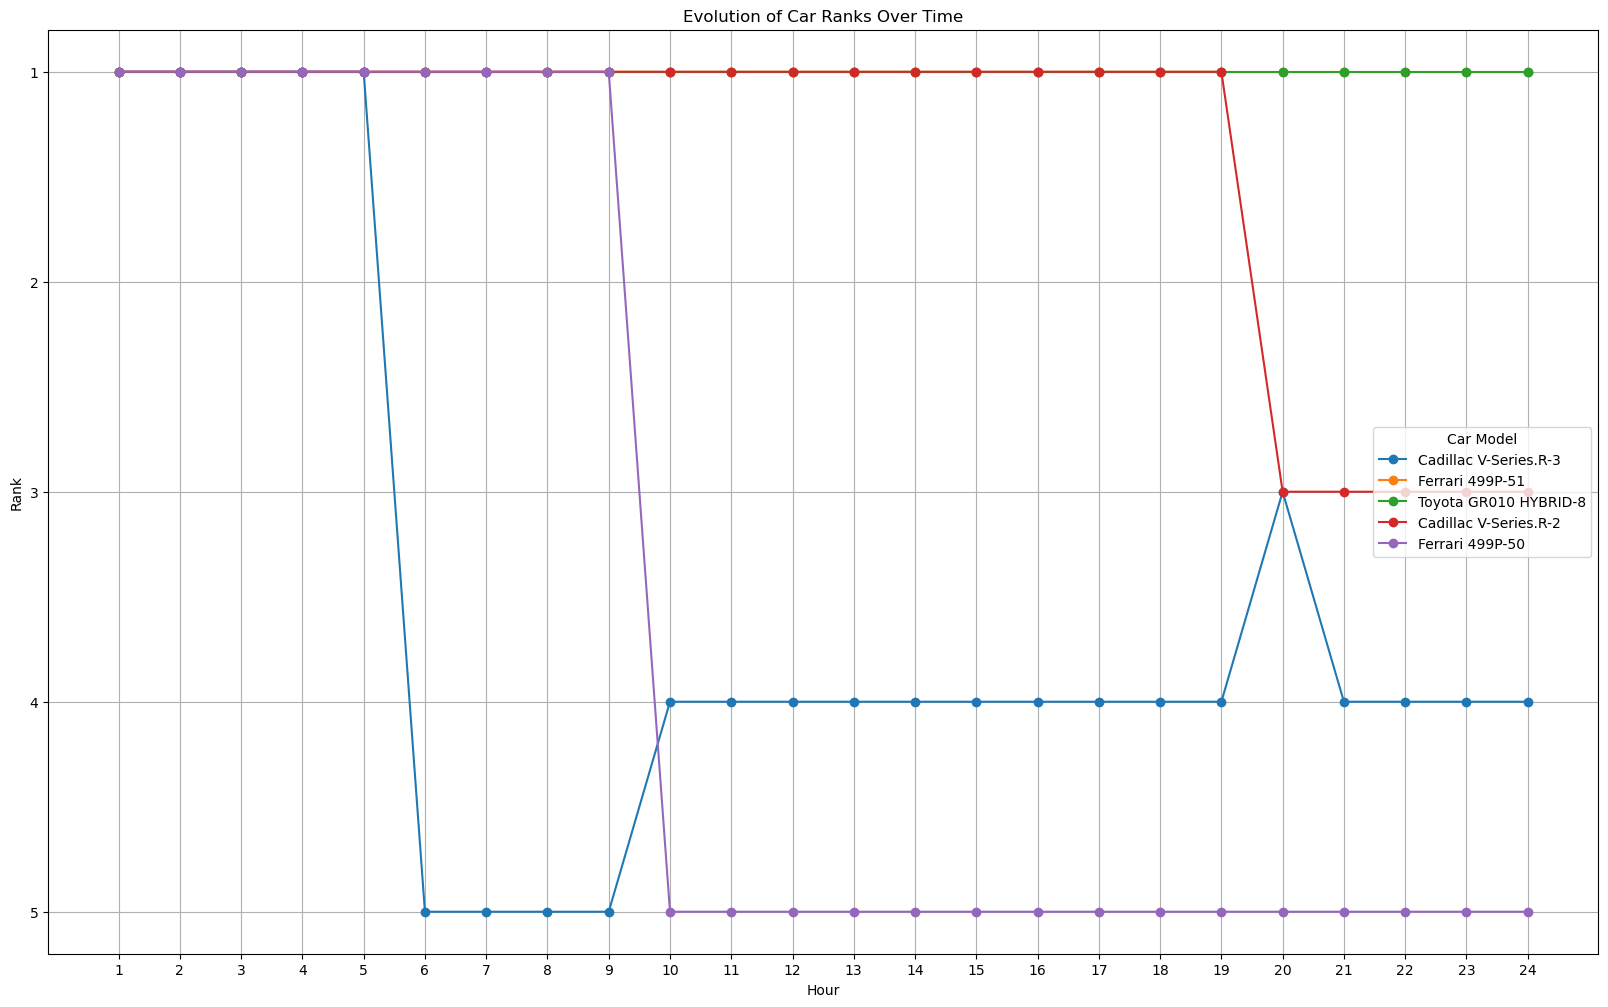

In [642]:
plt.figure(figsize=(20, 12))

#Car evolution over the hours
for car_model in df_top_5['Car Model'].unique():
    car_data = df_top_5[df_top_5['Car Model'] == car_model]
    plt.plot(car_data['Hour'], car_data['Rank Adjusted'], marker='o', label=car_model)

#1 must be upwards
plt.gca().invert_yaxis()

plt.yticks([1, 2, 3, 4, 5])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

plt.xlabel('Hour')
plt.ylabel('Rank')
plt.title('Evolution of Car Ranks Over Time')
plt.legend(title='Car Model',loc='center right')
plt.grid(True)

# Display
plt.show()

### Best lap for every car, hour after hour

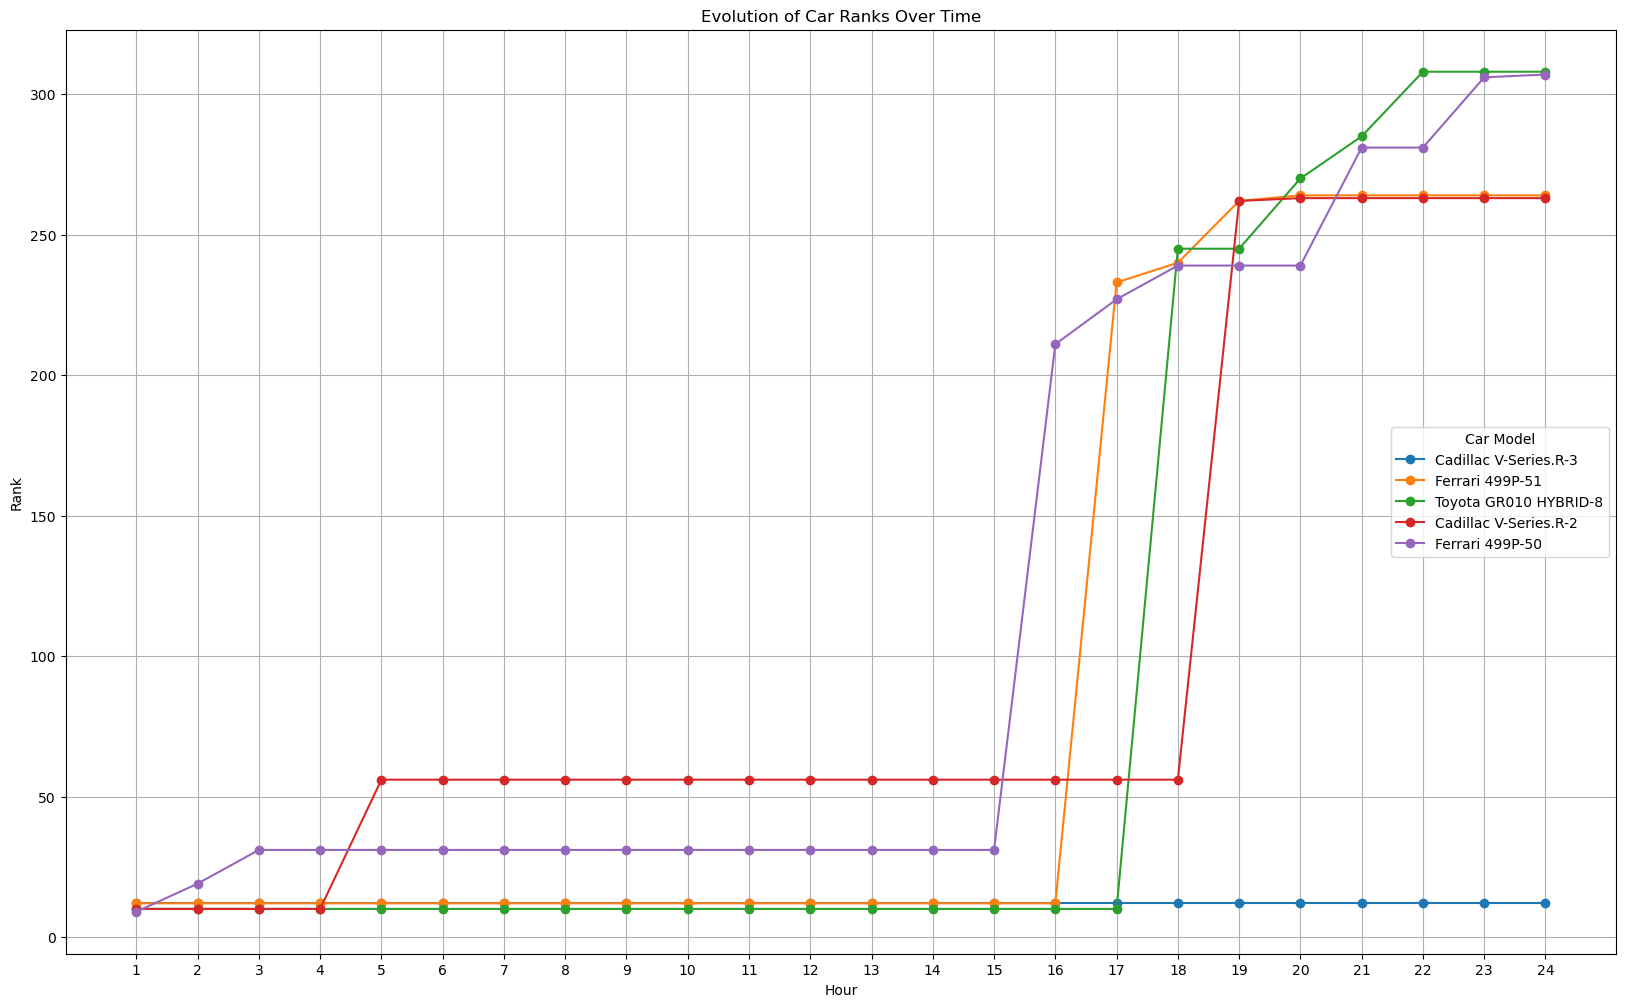

In [643]:
plt.figure(figsize=(20, 12))

#Car evolution over the hours
for car_model in df_top_5['Car Model'].unique():
    car_data = df_top_5[df_top_5['Car Model'] == car_model]
    plt.plot(car_data['Hour'], car_data['Best Lap Number'], marker='o', label=car_model)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

plt.xlabel('Hour')
plt.ylabel('Rank')
plt.title('Evolution of Car Ranks Over Time')
plt.legend(title='Car Model',loc='center right')
plt.grid(True)

# Display
plt.show()

### Best lap for every car

In [644]:
df_top_5['Best LapTime'] = pd.to_timedelta(df_top_5['Best LapTime'])# Convert Best LapTime into a Time format column

In [645]:
df_top_5.groupby('Car Model')['Best LapTime'].min()

Car Model
Cadillac V-Series.R-2   0 days 00:03:28
Cadillac V-Series.R-3   0 days 00:03:28
Ferrari 499P-50         0 days 00:03:27
Ferrari 499P-51         0 days 00:03:27
Toyota GR010 HYBRID-8   0 days 00:03:27
Name: Best LapTime, dtype: timedelta64[ns]

Looks like the Cadillac V-Series.R-3 started well. It was among the leaders during the 5 first laps. The best time was done quickly during the race. Unfortunately, it seems the car was not able to level up afterwards.

The Cadillac V-Series.R-2 has the same best chrono, indicating that Cadillac was slightly inferior to its competitors in terms of max speed. This car improved its chrono during the race and finished at the 3rd place. While the V-Series.R-3 seemed to start well and rely on this good start, the other Cadillac improved during the race, with a better output at the end.

The 2 Ferrari and the Toyota are really close in terms of performance. They all have the same best time during the race. The Ferrari 499P-50 was with the leaders during the first 10 hours and went down between the hour 9 and the hour 10. It must be due to a technical issue or to an incident.

The Ferrari 499P-51 and the Toyota GR010 led the race together. At the end, the Ferrari won with the same number of laps.


## What could explain why Ferrari won and not Toyota?

### Assumption 1 : Average speed

We can just rely on the speed of the best lap here. We will calculate the mean of this value to estimate an average speed for every car in the top 5.

In [647]:
df_top_5.groupby('Car Model')['Best Lap Kph'].mean()

Car Model
Cadillac V-Series.R-2    234.162500
Cadillac V-Series.R-3    235.500000
Ferrari 499P-50          235.216667
Ferrari 499P-51          234.983333
Toyota GR010 HYBRID-8    234.450000
Name: Best Lap Kph, dtype: float64

Seems the Ferrari is still doing better than the Toyota. By the way, the two are close. 
It should not be a decisivee factor, as the 2 leading cars don't have the best average speeds.

### Assumption 2 : Number of pitstops

In [650]:
df_top_5[df_top_5['Hour']==24][['Car Model','Pitstops']]

,Car Model,Pitstops
1426,Toyota GR010 HYBRID-8,31
1425,Ferrari 499P-51,30
1427,Cadillac V-Series.R-2,29
1428,Cadillac V-Series.R-3,30
1429,Ferrari 499P-50,31


Toyota has one more pitstop. With a car slightly faster, and less pitstops, Ferrari won.

In the absence of consumption data, we cannot say it's due to a better autonomy of the car of it's due to a better management from the team.

We should also need to know if the car got some incident. Could be a futher work with this dataset.

## How Peugeot could do better?

Peugeot was supposed to be in the top 5. It did not happen. Why?

Let's compare the performance of the 2 Peugeot versus the performance of the top 5.

In [656]:
peugeot_93 = df[df['Car Model']=='Peugeot 9X8-93']

In [657]:
peugeot_94 = df[df['Car Model']=='Peugeot 9X8-94']

### Number of pitstops

In [670]:
p93 = peugeot_93[peugeot_93['Hour'] == 24]['Pitstops'].values[0]
p94 = peugeot_94[peugeot_94['Hour'] == 24]['Pitstops'].values[0]
top5 = df_top_5[df_top_5['Hour']==24]['Pitstops'].mean()

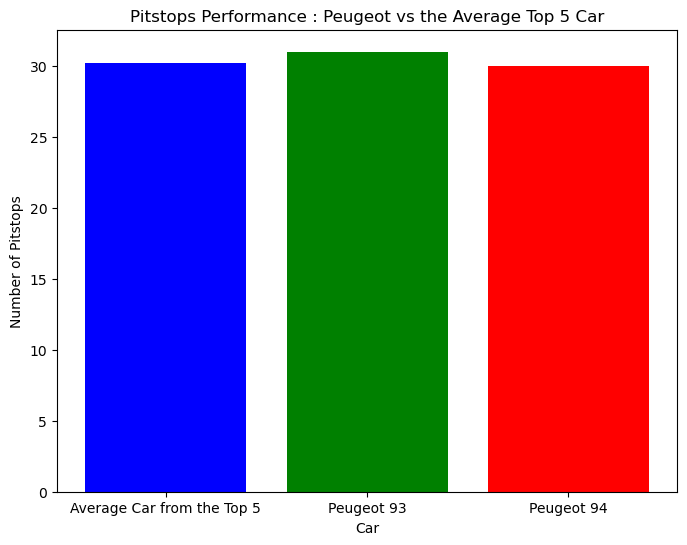

In [672]:
# Bar data
labels = ['Average Car from the Top 5', 'Peugeot 93', 'Peugeot 94']
values = [top5, p93, p94]  

# Figure
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])

# Labels
plt.xlabel('Car')
plt.ylabel('Number of Pitstops')
plt.title('Pitstops Performance : Peugeot vs the Average Top 5 Car')

# Display
plt.show()

Looks like the number of pitstops is quite the same. It was managed well by the Peugeot team. Let's move to the next factor.

### Average Speed

In [677]:
p93 = peugeot_93['Best Lap Kph'].mean()
p94 = peugeot_94['Best Lap Kph'].mean()
top5 = df_top_5['Best Lap Kph'].mean()

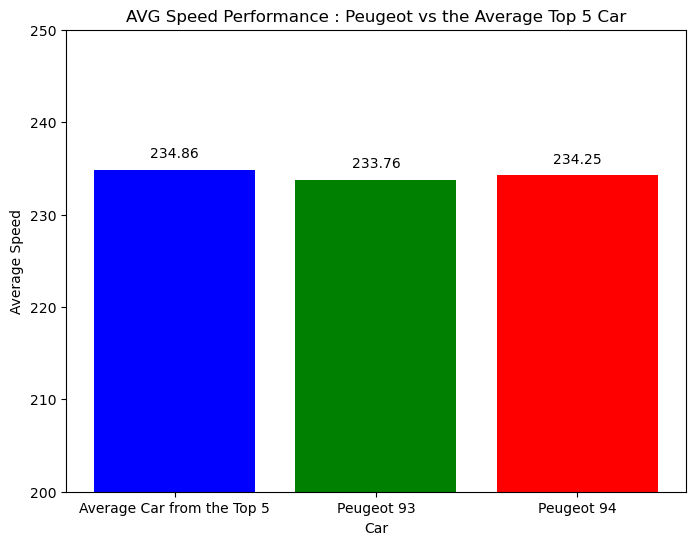

In [694]:
# Bar data
labels = ['Average Car from the Top 5', 'Peugeot 93', 'Peugeot 94']
values = [top5, p93, p94]  

# Figure
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['blue', 'green', 'red'])

# Labels
plt.xlabel('Car')
plt.ylabel('Average Speed')
plt.title('AVG Speed Performance : Peugeot vs the Average Top 5 Car')

# Labelling the data
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.ylim(200, 250)

# Display
plt.show()

Looks like the Peugeot 93 was not fast enough. The performance from the Peugot 94 looks interesting. Let's check how it performed compared to the top 5 over the hours.

### New Rankings, including Peugeot vs Top 5

In [683]:
top_5_vs_Peugeot = pd.concat([df_top_5,peugeot_93,peugeot_94],ignore_index=True)

In [684]:
top_5_vs_Peugeot

,S.No,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,Status,Car Model,Rank,Rank Adjusted
0,21,1,3,Cadillac Racing,S. BOURDAIS / R. VAN DER ZANDE / S. DIXON,Cadillac V-Series.R,HYPERCAR,M,12,0 days 01:02:31,1,12.0,0 days 00:03:28,235.5,Running,Cadillac V-Series.R-3,1.0,1.0
1,2,1,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,12,0 days 01:01:19,0,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51,2.0,1.0
2,1,1,8,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA,Toyota GR010 HYBRID,HYPERCAR,M,12,0 days 01:01:15,0,10.0,0 days 00:03:29,234.0,Running,Toyota GR010 HYBRID-8,3.0,1.0
3,7,1,2,Cadillac Racing,E. BAMBER / A. LYNN / R. WESTBROOK,Cadillac V-Series.R,HYPERCAR,M,12,0 days 01:01:24,0,10.0,0 days 00:03:30,233.4,Running,Cadillac V-Series.R-2,4.0,1.0
4,14,1,50,Ferrari AF Corse,A. FUOCO / M. MOLINA / N. NIELSEN,Ferrari 499P,HYPERCAR,M,12,0 days 01:02:16,1,9.0,0 days 00:03:30,233.4,Running,Ferrari 499P-50,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1188,20,94,Peugeot TotalEnergies,L. DUVAL / G. MENEZES / N. MÃLLER,Peugeot 9X8,HYPERCAR,M,267,0 days 20:01:05,25,240.0,0 days 00:03:29,234.3,Running,Peugeot 9X8-94,NaN,NaN
163,1249,21,94,Peugeot TotalEnergies,L. DUVAL / G. MENEZES / N. MÃLLER,Peugeot 9X8,HYPERCAR,M,281,0 days 20:53:50,27,275.0,0 days 00:03:28,235.3,Running,Peugeot 9X8-94,NaN,NaN
164,1319,22,94,Peugeot TotalEnergies,L. DUVAL / G. MENEZES / N. MÃLLER,Peugeot 9X8,HYPERCAR,M,292,0 days 22:01:24,27,275.0,0 days 00:03:28,235.3,Running,Peugeot 9X8-94,NaN,NaN
165,1380,23,94,Peugeot TotalEnergies,L. DUVAL / G. MENEZES / N. MÃLLER,Peugeot 9X8,HYPERCAR,M,309,0 days 23:03:48,29,275.0,0 days 00:03:28,235.3,Running,Peugeot 9X8-94,NaN,NaN


In [685]:
top_5_vs_Peugeot['New_Rank'] = top_5_vs_Peugeot.groupby('Hour')['Laps'].rank(method='min', ascending=False)

In [688]:
top_5_vs_Peugeot

,S.No,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,Status,Car Model,Rank,Rank Adjusted,New_Rank
0,21,1,3,Cadillac Racing,S. BOURDAIS / R. VAN DER ZANDE / S. DIXON,Cadillac V-Series.R,HYPERCAR,M,12,0 days 01:02:31,1,12.0,0 days 00:03:28,235.5,Running,Cadillac V-Series.R-3,1.0,1.0,1.0
1,2,1,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,12,0 days 01:01:19,0,12.0,0 days 00:03:29,234.6,Running,Ferrari 499P-51,2.0,1.0,1.0
2,1,1,8,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA,Toyota GR010 HYBRID,HYPERCAR,M,12,0 days 01:01:15,0,10.0,0 days 00:03:29,234.0,Running,Toyota GR010 HYBRID-8,3.0,1.0,1.0
3,7,1,2,Cadillac Racing,E. BAMBER / A. LYNN / R. WESTBROOK,Cadillac V-Series.R,HYPERCAR,M,12,0 days 01:01:24,0,10.0,0 days 00:03:30,233.4,Running,Cadillac V-Series.R-2,4.0,1.0,1.0
4,14,1,50,Ferrari AF Corse,A. FUOCO / M. MOLINA / N. NIELSEN,Ferrari 499P,HYPERCAR,M,12,0 days 01:02:16,1,9.0,0 days 00:03:30,233.4,Running,Ferrari 499P-50,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1188,20,94,Peugeot TotalEnergies,L. DUVAL / G. MENEZES / N. MÃLLER,Peugeot 9X8,HYPERCAR,M,267,0 days 20:01:05,25,240.0,0 days 00:03:29,234.3,Running,Peugeot 9X8-94,NaN,NaN,7.0
163,1249,21,94,Peugeot TotalEnergies,L. DUVAL / G. MENEZES / N. MÃLLER,Peugeot 9X8,HYPERCAR,M,281,0 days 20:53:50,27,275.0,0 days 00:03:28,235.3,Running,Peugeot 9X8-94,NaN,NaN,7.0
164,1319,22,94,Peugeot TotalEnergies,L. DUVAL / G. MENEZES / N. MÃLLER,Peugeot 9X8,HYPERCAR,M,292,0 days 22:01:24,27,275.0,0 days 00:03:28,235.3,Running,Peugeot 9X8-94,NaN,NaN,7.0
165,1380,23,94,Peugeot TotalEnergies,L. DUVAL / G. MENEZES / N. MÃLLER,Peugeot 9X8,HYPERCAR,M,309,0 days 23:03:48,29,275.0,0 days 00:03:28,235.3,Running,Peugeot 9X8-94,NaN,NaN,7.0


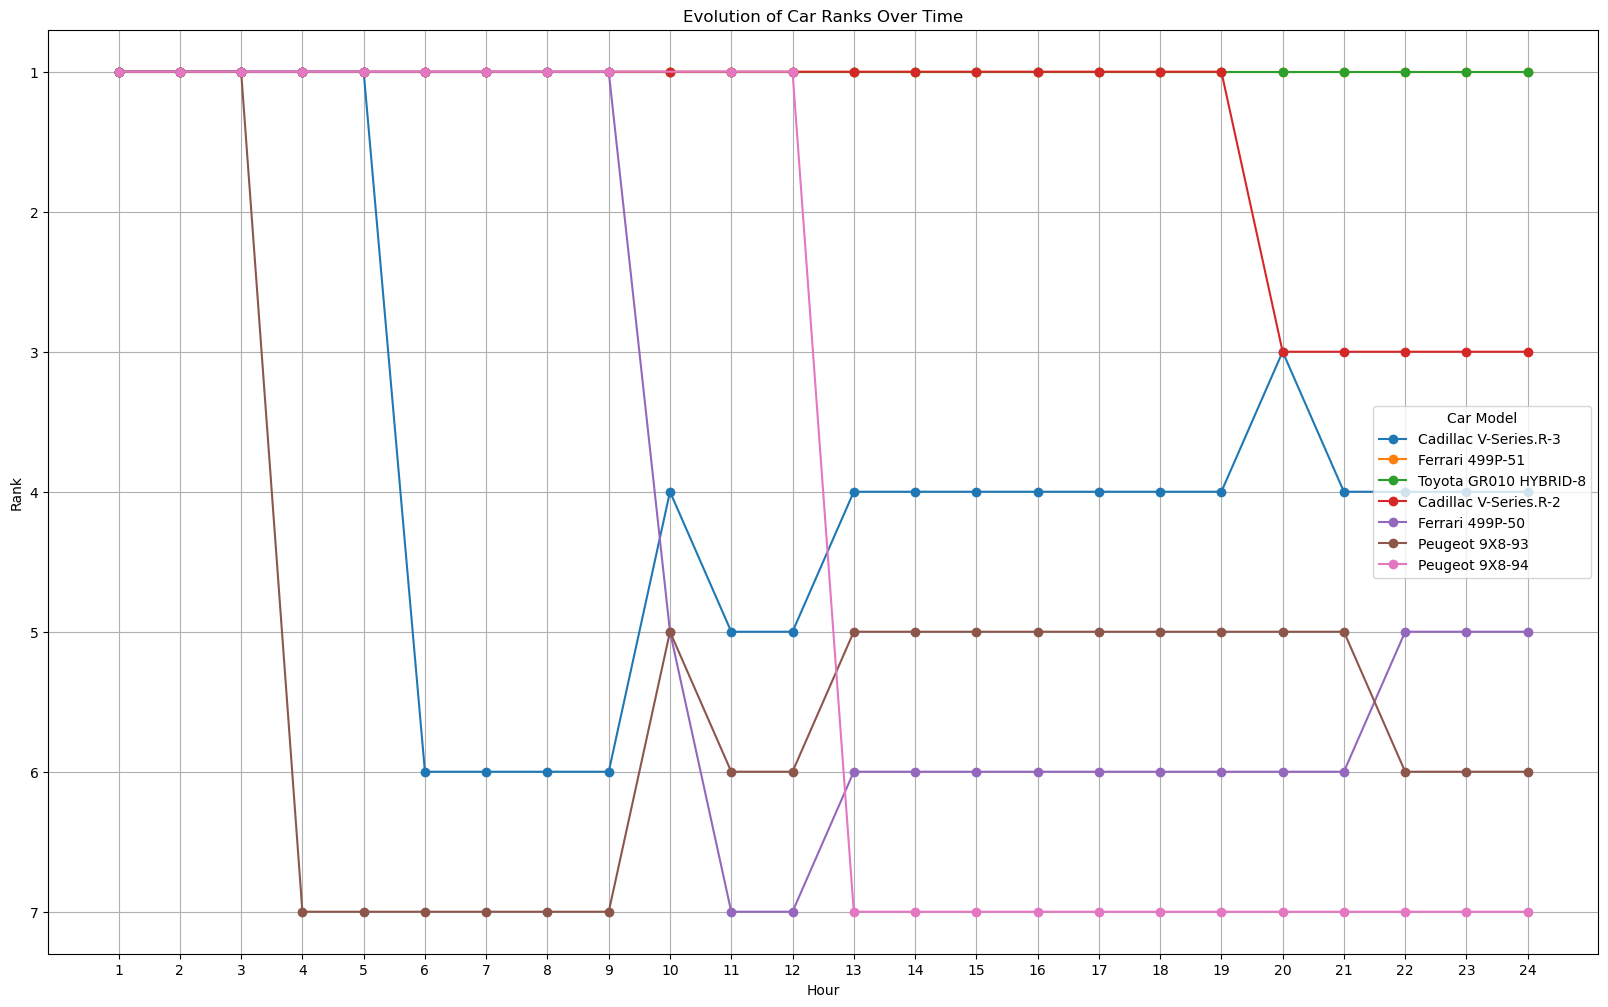

In [689]:
plt.figure(figsize=(20, 12))

#Car evolution over the hours
for car_model in top_5_vs_Peugeot['Car Model'].unique():
    car_data = top_5_vs_Peugeot[top_5_vs_Peugeot['Car Model'] == car_model]
    plt.plot(car_data['Hour'], car_data['New_Rank'], marker='o', label=car_model)

#1 must be upwards
plt.gca().invert_yaxis()

plt.yticks([1, 2, 3, 4, 5, 6, 7])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

plt.xlabel('Hour')
plt.ylabel('Rank')
plt.title('Evolution of Car Ranks Over Time')
plt.legend(title='Car Model',loc='center right')
plt.grid(True)

# Display
plt.show()

The Peugeot 93 was among the leaders for the first 3 hours. It seems the car had a technical issue or was not fast enough to keep the distance.

The Peugeot 94 was doing great during the first half of the race. The sharp decline at the Hour 12 clearly indicates a massive technical issue or an incident.

### Best lap for the Peugeot

In [691]:
peugeot = pd.concat([peugeot_93,peugeot_94],ignore_index=True)

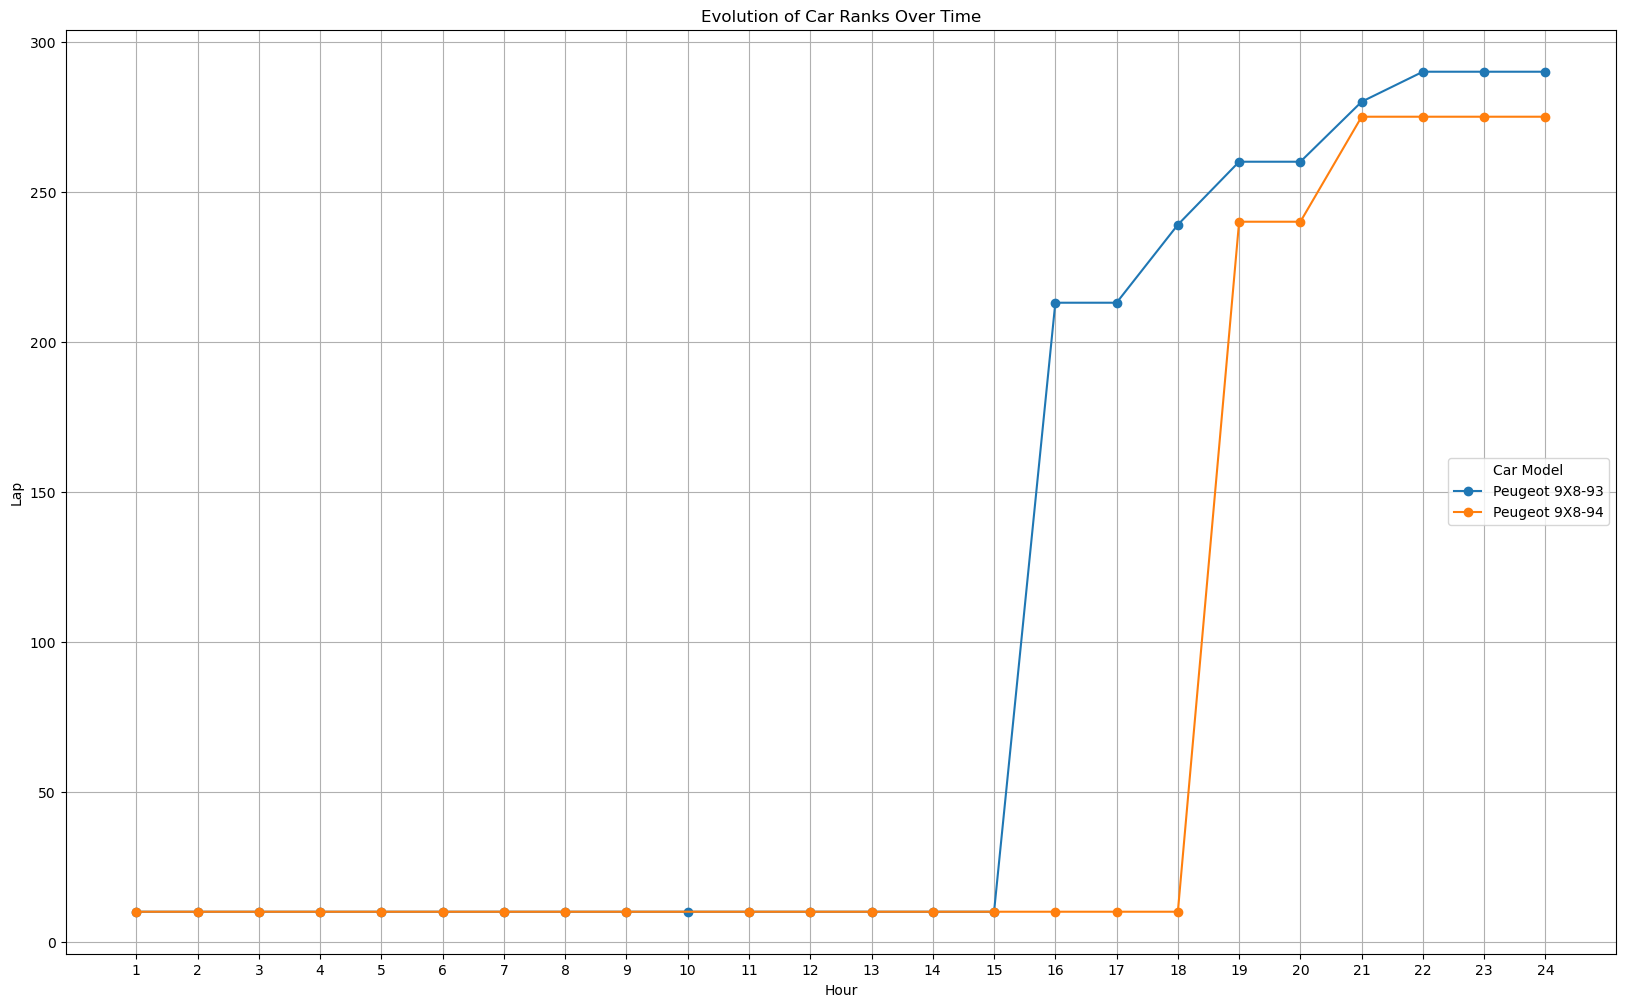

In [695]:
plt.figure(figsize=(20, 12))

#Car evolution over the hours
for car_model in peugeot['Car Model'].unique():
    car_data = peugeot[peugeot['Car Model'] == car_model]
    plt.plot(car_data['Hour'], car_data['Best Lap Number'], marker='o', label=car_model)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

plt.xlabel('Hour')
plt.ylabel('Lap')
plt.title('Evolution of Car Ranks Over Time')
plt.legend(title='Car Model',loc='center right')
plt.grid(True)

# Display
plt.show()

### Conclusion for Peugeot teams

The race was managed well. Unfortunately, an incident happened for the Peugeot 94 at mid-race.

Until then, the car was among the leaders. It's impressive. 

You should improve the speed of the car, which is still a bit far from the Top 5. This is your main area for improvement.
                                                                                                        
Let's note that your two cars start improving their max speed lap after the mid-race. It seems a bit unconsistent when we know the Peugeot 94 had its best ranking during the first 12 hours.

Speed is not everything, but it's a lot. Keep managing your pitstops well and following the leaders as much as you can.

You could get a top 5 ranking in Le Mans with this level of performance. On that track, so many things can happen and some issues can arise for you competitors. You could take advantage from it.

But, if you want to be sure to win one day, you must increase the level of speed your cars can reach.
It remains not aligned with what Ferrari and Toyota are able to provide.